In [22]:
import os
import pickle
import numpy as np
import torch
import gym
import load_policy_pytorch

import tensorflow as tf
from random import randint

import numpy as np
import pandas as pd
import os
import glob
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

eps = np.finfo(float).eps

plt.rcParams['figure.figsize'] = 10, 10
%matplotlib inline


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
with open(os.path.join('expert_data', 'Humanoid-v2' + '.pkl'), 'rb') as f:
    expert_data = pickle.load(f)

In [13]:
list(expert_data)

['observations', 'actions']

In [14]:
expert_data['observations'].shape

(500, 376)

In [15]:
expert_data['actions'].shape

(500, 1, 17)

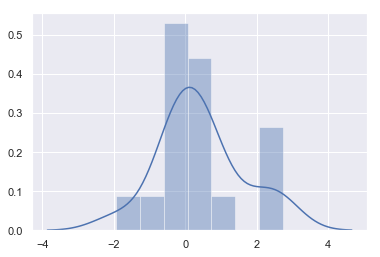

In [24]:
sns.set()
sns.distplot(expert_data['actions'][0, :])

In [25]:
inps = torch.from_numpy(expert_data['observations'])
tgts = torch.from_numpy(expert_data['actions'])

In [27]:
inps.size(1)

376

In [ ]:
torch.FloatTensor

In [9]:
# Categorical log likelihood vs softmax_cross_entropy_with_logits

In [14]:
def one_hot_np(labels, n_class):
    vec = np.zeros((labels.shape[0], n_class))
    for ind, label in enumerate(labels):
        vec[ind, label] = 1
    return vec

In [44]:
dims = 8
pos = randint(0, dims - 1)

logits = np.random.uniform(0, 3, dims)
labels = one_hot_np(np.asarray([pos]), dims)

# tf
res1 = tf.nn.softmax_cross_entropy_with_logits(
    logits=tf.convert_to_tensor(logits, np.float64),
    labels = tf.convert_to_tensor(labels, np.float64))

# torch
dist = torch.distributions.categorical.Categorical(logits=torch.from_numpy(logits))
res2 = dist.log_prob(torch.tensor([pos]))

with tf.Session() as sess:
    a = sess.run([res1])
    print(a)
                                     
print(res2)

[3.0310188673730565]
tensor([-3.0310], dtype=torch.float64)


In [36]:
a = labels[0][0]

In [38]:
type(a)

numpy.float64

In [45]:
logits

array([2.9959961 , 2.62596313, 2.86251993, 1.47985573, 1.38557515,
       2.31079869, 2.14072484, 2.54121804])

In [46]:
labels

array([[0., 0., 0., 1., 0., 0., 0., 0.]])

In [47]:
pos

3

In [49]:
np.log(1)

0.0

In [50]:
# normalize
def normalize(values, mean=0., std=1.):
    values = (values - values.mean()) / (values.std() + 1e-8)
    return mean + (std + 1e-8) * values

In [51]:
values = np.random.randn(1000) * 2.5 + 5.

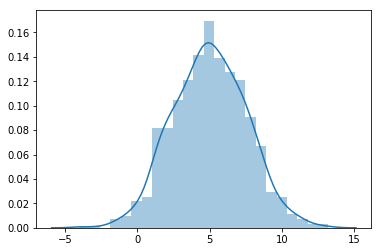

In [52]:
sns.distplot(values)